#        PREDICTING THE ALPHA SIGNAL USING MICROBLOGGING DATA



## PROBLEM STATEMENT :

###      A hedge fund company uses stock factors to predict the alpha signal (i.e, level of performance) in a stock. This alpha signal is used to make purchase decisions about the stock.                                                           The hedge fund company  now collects and tags microblogging data for sentiment from ‘StockTwits'(platform where people trade stocks regularly).                                                                                                                               Now we need to build a sentimental analysis using tagged data and then it is  used to predict new stock factor using the sentiment from stockstwits site and use the predicted new stock factor and combine with the rest of stock factors and predict the alpha signal.


#                                                         JSON FILE PREPROCESSING

####  PREPROCESSING STEPS FOR BOTH TRAIN AND TEST DATA :

In [187]:
#importing all necessary libraries
import json
import pandas as pd 
from pandas.io.json import json_normalize  
import nltk 
import string 
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
# reading the json train data 
json_data = pd.read_json('D:\\PHD FINAL\\train_data-1573118738755.json')  

In [189]:
# reading the json train data as dataframe
json_data = json_normalize(json_data['records']) 
json_data.head() 

,sentiment_score,stocktwit_tweet,ticker,timestamp
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19 18:38:28+00:00
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09 03:51:06+00:00
2,2,$AVGO WTF?,$AVGO,2018-07-12 13:35:32+00:00
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19 03:32:50+00:00
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23 19:07:54+00:00


In [190]:
# checking the json train data at the bottom also whether it is converted to a dataframe
json_data.tail()

,sentiment_score,stocktwit_tweet,ticker,timestamp
1039126,2,$CLF https://twitter.com/hrdrckminer/status/10...,$CLF,2018-08-13 22:15:04+00:00
1039127,3,$AMD 🔥🔥🔥,$AMD,2018-09-04 15:25:59+00:00
1039128,0,$FB damn should of shorted 196 after hours to ...,$FB,2018-07-25 21:29:03+00:00
1039129,0,$AMD back to the 31&#39;s,$AMD,2018-09-28 16:19:55+00:00
1039130,2,$AMZN Lagging other tech today.,$AMZN,2018-07-05 17:14:00+00:00


In [191]:
# reading the json test data 
j_data = pd.read_json('D:\\PHD FINAL\\TestData\\test_data.json')  

In [192]:
# reading the json test data as dataframe
j_data = json_normalize(j_data['records']) 
j_data.head() 

,stocktwit_tweet,ticker,timestamp
0,$CELG nothing to be exited about,$CELG,2018-10-25 14:26:16+00:00
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13 13:50:39+00:00
2,$AMD day traders day.,$AMD,2018-09-25 19:10:54+00:00
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27 22:45:48+00:00
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31 14:59:06+00:00


In [193]:
# checking the json test data at the bottom also whether it is converted to a dataframe
j_data.tail()

,stocktwit_tweet,ticker,timestamp
265017,$CVS recent bad PR made this an easy pick to l...,$CVS,2018-07-20 15:54:50+00:00
265018,Here’s what 16 Estimize analysts believe $S wi...,$S,2018-10-24 22:56:18+00:00
265019,"$AMD Could be at 18 or high 17s. If not, will...",$AMD,2018-07-25 21:48:25+00:00
265020,$TSN files form 10-Q https://fintel.io/filings...,$TSN,2018-08-06 11:43:24+00:00
265021,$AAPL looks like it is solidly supporting its ...,$AAPL,2018-09-27 18:28:58+00:00


In [194]:
# checking the datatypes of the train data given
json_data.dtypes

sentiment_score     int64
stocktwit_tweet    object
ticker             object
timestamp          object
dtype: object

In [195]:
# checking the datatypes of the test data given
j_data.dtypes

stocktwit_tweet    object
ticker             object
timestamp          object
dtype: object

In [196]:
# change the datatype of timestamp to datetime for the train data
import datetime as datetime
json_data['timestamp']=pd.to_datetime(json_data['timestamp'])

In [197]:
# spliting the timestamp coloumn to date and time coloumn for train data
json_data['date']=json_data['timestamp'].apply(lambda x:x.date)
json_data['time']=json_data['timestamp'].apply(lambda x:x.time)

In [198]:
json_data.dtypes

sentiment_score                  int64
stocktwit_tweet                 object
ticker                          object
timestamp          datetime64[ns, UTC]
date                            object
time                            object
dtype: object

In [199]:
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,timestamp,date,time
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19 18:38:28+00:00,2018-09-19,18:38:28
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09 03:51:06+00:00,2018-10-09,03:51:06
2,2,$AVGO WTF?,$AVGO,2018-07-12 13:35:32+00:00,2018-07-12,13:35:32
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19 03:32:50+00:00,2018-07-19,03:32:50
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23 19:07:54+00:00,2018-08-23,19:07:54


In [200]:
# change the datatype of timestamp to datetime for test data
import datetime as datetime
j_data['timestamp']=pd.to_datetime(j_data['timestamp'])

In [201]:
# spliting the timestamp coloumn to date and time coloumn for test data
j_data['date']=j_data['timestamp'].apply(lambda x:x.date) 
j_data['time']=j_data['timestamp'].apply(lambda x:x.time)

In [202]:
j_data.dtypes

stocktwit_tweet                 object
ticker                          object
timestamp          datetime64[ns, UTC]
date                            object
time                            object
dtype: object

In [203]:
j_data.head()

,stocktwit_tweet,ticker,timestamp,date,time
0,$CELG nothing to be exited about,$CELG,2018-10-25 14:26:16+00:00,2018-10-25,14:26:16
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13 13:50:39+00:00,2018-07-13,13:50:39
2,$AMD day traders day.,$AMD,2018-09-25 19:10:54+00:00,2018-09-25,19:10:54
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27 22:45:48+00:00,2018-07-27,22:45:48
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31 14:59:06+00:00,2018-07-31,14:59:06


In [204]:
# dropping the timestamp column for the train data
cols_drop = ['timestamp']
json_data.drop(cols_drop,axis=1,inplace=True)

In [205]:
#checkng wether it is dropped or not
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19,18:38:28
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09,03:51:06
2,2,$AVGO WTF?,$AVGO,2018-07-12,13:35:32
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19,03:32:50
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23,19:07:54


In [206]:
# dropping the timestamp column for test data 
cols_drop = ['timestamp']
j_data.drop(cols_drop,axis=1,inplace=True)

In [207]:
j_data.head()

,stocktwit_tweet,ticker,date,time
0,$CELG nothing to be exited about,$CELG,2018-10-25,14:26:16
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13,13:50:39
2,$AMD day traders day.,$AMD,2018-09-25,19:10:54
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27,22:45:48
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31,14:59:06


In [208]:
#to check whether null values are present in train data
json_data.isnull().sum()

sentiment_score    0
stocktwit_tweet    0
ticker             0
date               0
time               0
dtype: int64

In [209]:
#to check whether null values are present in test  data
j_data.isnull().sum()

stocktwit_tweet    0
ticker             0
date               0
time               0
dtype: int64

In [210]:
#to see the sum of sentiment score for a value for train data
json_data["sentiment_score"].value_counts()

2    464402
3    208031
4    153905
1    120771
0     92022
Name: sentiment_score, dtype: int64

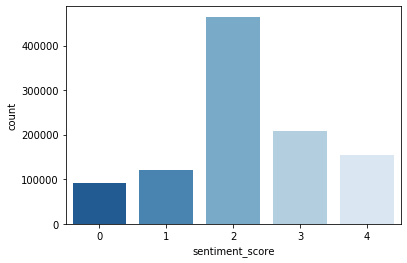

In [363]:
sns.countplot(x="sentiment_score",data=json_data,palette="Blues_r")

In [211]:
#for removing the company name along with dollar from train data
json_data.stocktwit_tweet =json_data.stocktwit_tweet.replace('\$\w+', ' ',regex=True).astype(object)

In [212]:
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,going up but hesitating however chart is ver...,$AMD,2018-09-19,18:38:28
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09,03:51:06
2,2,WTF?,$AVGO,2018-07-12,13:35:32
3,2,\n New Insider Filing On: \n MULLER KLAUS PET...,$PH,2018-07-19,03:32:50
4,3,if it bounces tommorrow do the right thing a...,$FB,2018-08-23,19:07:54


In [213]:
#for removing the company name along with dollar from test data
j_data.stocktwit_tweet=j_data.stocktwit_tweet.replace('\$\w+', ' ',regex=True).astype(object)

In [214]:
j_data.head()

,stocktwit_tweet,ticker,date,time
0,nothing to be exited about,$CELG,2018-10-25,14:26:16
1,yall exhaust your buyer on first green candl...,$AMD,2018-07-13,13:50:39
2,day traders day.,$AMD,2018-09-25,19:10:54
3,https://tenor.com/wLB8.gif,$CBS,2018-07-27,22:45:48
4,weak price action so far today. Don’t be afr...,$MU,2018-07-31,14:59:06


In [215]:
#for removing the name along with @ along with its words from train data
json_data.stocktwit_tweet=json_data.stocktwit_tweet.replace('\@\w+', '',regex=True).astype(object)

In [216]:
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,going up but hesitating however chart is ver...,$AMD,2018-09-19,18:38:28
1,3,Despite\nChina trade war held very well 👍,$CAT,2018-10-09,03:51:06
2,2,WTF?,$AVGO,2018-07-12,13:35:32
3,2,\n New Insider Filing On: \n MULLER KLAUS PET...,$PH,2018-07-19,03:32:50
4,3,if it bounces tommorrow do the right thing a...,$FB,2018-08-23,19:07:54


In [217]:
#for removing the name along with @ along with its words  from test data
j_data.stocktwit_tweet=j_data.stocktwit_tweet.replace('\@\w+', '',regex=True).astype(object)

In [218]:
j_data.head()

,stocktwit_tweet,ticker,date,time
0,nothing to be exited about,$CELG,2018-10-25,14:26:16
1,yall exhaust your buyer on first green candl...,$AMD,2018-07-13,13:50:39
2,day traders day.,$AMD,2018-09-25,19:10:54
3,https://tenor.com/wLB8.gif,$CBS,2018-07-27,22:45:48
4,weak price action so far today. Don’t be afr...,$MU,2018-07-31,14:59:06


In [219]:
# removing the urls from the given train data
pattern = r"http\S+"
json_data['stocktwit_tweet']=[re.sub(pattern,"",text) for text in json_data['stocktwit_tweet']]

In [220]:
# checking whether urls are removed by taking a particular coloumn
json_data['stocktwit_tweet'][6]

'  UnitedHealth Group Goes Ex-Dividend Today '

In [221]:
# removing the urls from the given test data
pattern = r"http\S+"
j_data['stocktwit_tweet']=[re.sub(pattern,"",text) for text in j_data['stocktwit_tweet']]

In [222]:
# checking whether urls are removed by taking a particular coloumn
j_data['stocktwit_tweet'][6]

'  If you are not loading up right now, you are clueless'

In [223]:
#changing the data of stocktwit_tweet to all lower case letters of train data
def text_lowercase(text): 
    return text.lower()

In [224]:
json_data['stocktwit_tweet'] = json_data['stocktwit_tweet'].apply(lambda x:text_lowercase(x))

In [225]:
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,going up but hesitating however chart is ver...,$AMD,2018-09-19,18:38:28
1,3,despite\nchina trade war held very well 👍,$CAT,2018-10-09,03:51:06
2,2,wtf?,$AVGO,2018-07-12,13:35:32
3,2,\n new insider filing on: \n muller klaus pet...,$PH,2018-07-19,03:32:50
4,3,if it bounces tommorrow do the right thing a...,$FB,2018-08-23,19:07:54


In [226]:
#changing the data of stocktwit_tweet to all lower case letters of test data
def text_lowercase(text): 
    return text.lower()

In [227]:
j_data['stocktwit_tweet'] = j_data['stocktwit_tweet'].apply(lambda x:text_lowercase(x))

In [228]:
j_data.head()

,stocktwit_tweet,ticker,date,time
0,nothing to be exited about,$CELG,2018-10-25,14:26:16
1,yall exhaust your buyer on first green candl...,$AMD,2018-07-13,13:50:39
2,day traders day.,$AMD,2018-09-25,19:10:54
3,,$CBS,2018-07-27,22:45:48
4,weak price action so far today. don’t be afr...,$MU,2018-07-31,14:59:06


In [229]:
# removing punctuations from the train data
def remove_punctuations(text):
    text=re.sub(r'[^\w]',' ',text)
    #data['stocktwit_tweet']=data['stocktwit_tweet'].apply(apply(lambda text: remove_punctuation(text))
    return text
json_data['stocktwit_tweet']=json_data['stocktwit_tweet'].apply(lambda text: remove_punctuations(text))

In [230]:
# checking wether the punctuations are removed  using a particular coloumn
json_data['stocktwit_tweet'][1]

'  despite china trade war   held very well  '

In [231]:
# removing punctuations from the test data
def remove_punctuations(text):
    text=re.sub(r'[^\w]',' ',text)
    #data['stocktwit_tweet']=data['stocktwit_tweet'].apply(apply(lambda text: remove_punctuation(text))
    return text
j_data['stocktwit_tweet']=j_data['stocktwit_tweet'].apply(lambda text: remove_punctuations(text))

In [232]:
# checking wether the punctuations are removed  using a particular coloumn
j_data['stocktwit_tweet'][1]

'  yall exhaust your buyer on first green candle     byeeeeee'

In [233]:
# removing numbers present in the train data
def remove_numbers(text):
    text=re.sub(r'\d+','',text)
    #data['stocktwit_tweet']=data['stocktwit_tweet'].apply(apply(lambda text: remove_punctuation(text))
    return text

json_data['stocktwit_tweet']=json_data['stocktwit_tweet'].apply(lambda text: remove_numbers(str(text)))

In [234]:
# checking whether numbers are removed or not
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,going up but hesitating however chart is ver...,$AMD,2018-09-19,18:38:28
1,3,despite china trade war held very well,$CAT,2018-10-09,03:51:06
2,2,wtf,$AVGO,2018-07-12,13:35:32
3,2,new insider filing on muller klaus peter...,$PH,2018-07-19,03:32:50
4,3,if it bounces tommorrow do the right thing a...,$FB,2018-08-23,19:07:54


In [235]:
# removing numbers present in the test data  
def remove_numbers(text):
    text=re.sub(r'\d+','',text)
    #data['stocktwit_tweet']=data['stocktwit_tweet'].apply(apply(lambda text: remove_punctuation(text))
    return text

j_data['stocktwit_tweet']=j_data['stocktwit_tweet'].apply(lambda text: remove_numbers(str(text)))

In [236]:
# checking whether the numbers are removed or not
j_data.head()

,stocktwit_tweet,ticker,date,time
0,nothing to be exited about,$CELG,2018-10-25,14:26:16
1,yall exhaust your buyer on first green candl...,$AMD,2018-07-13,13:50:39
2,day traders day,$AMD,2018-09-25,19:10:54
3,,$CBS,2018-07-27,22:45:48
4,weak price action so far today don t be afr...,$MU,2018-07-31,14:59:06


In [237]:
# remove whitespace from text from the train data 
def remove_whitespace(text): 
    return  " ".join(text.split()) 

In [238]:
json_data['stocktwit_tweet']=json_data['stocktwit_tweet'].apply(lambda text: remove_whitespace(text))

In [239]:
# checking whether white spaces are removed or not
json_data['stocktwit_tweet']

0          going up but hesitating however chart is very ...
1                     despite china trade war held very well
2                                                        wtf
3          new insider filing on muller klaus peter trans...
4          if it bounces tommorrow do the right thing and...
5                                     as usual red every day
6                  unitedhealth group goes ex dividend today
7                                  let s see when we can hit
8             i bet you re also the one saying should be smh
9                                          pastor the stooge
10             called it friday hahahaha suckers sold friday
11                          exp maxpain highputoi highcalloi
12           day in day out this puppy is making people rich
13                                                          
14                                                          
15         earnings august bmo aug straddle implies move ...
16                      

In [240]:
# remove whitespace from text from test data
def remove_whitespace(text): 
    return  " ".join(text.split()) 

In [241]:
j_data['stocktwit_tweet']=j_data['stocktwit_tweet'].apply(lambda text: remove_whitespace(text))

In [242]:
# checking whether white space are removed or not 
j_data['stocktwit_tweet']

0                                nothing to be exited about
1         yall exhaust your buyer on first green candle ...
2                                           day traders day
3                                                          
4         weak price action so far today don t be afraid...
5         continues to grow specifically in key areas li...
6         if you are not loading up right now you are cl...
7         crap shoot legit no one knows if it s going up...
8         how does this chart look like a setup for a di...
9                     amd is like my sex life its so dry rn
10        finally amd got its anti gravity technology an...
11        seems like a lot of todo to halt with minutes ...
12        you know mark has been dumping more shares the...
13        remember this trumppalo boycott aapl was then ...
14        positioning changed significantly over the pas...
15        keep in mind siggraph is next week and amd is ...
16        closes above its opening price

In [243]:
# for tokenization the train data
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()
json_data['stocktwit_tweet'] = json_data['stocktwit_tweet'].apply(token.tokenize)

In [244]:
# checking for train data
json_data['stocktwit_tweet']

0          [going, up, but, hesitating, however, chart, i...
1             [despite, china, trade, war, held, very, well]
2                                                      [wtf]
3          [new, insider, filing, on, muller, klaus, pete...
4          [if, it, bounces, tommorrow, do, the, right, t...
5                               [as, usual, red, every, day]
6           [unitedhealth, group, goes, ex, dividend, today]
7                          [let, s, see, when, we, can, hit]
8          [i, bet, you, re, also, the, one, saying, shou...
9                                      [pastor, the, stooge]
10         [called, it, friday, hahahaha, suckers, sold, ...
11                     [exp, maxpain, highputoi, highcalloi]
12         [day, in, day, out, this, puppy, is, making, p...
13                                                        []
14                                                        []
15         [earnings, august, bmo, aug, straddle, implies...
16                      

In [245]:
# for tokenization the test data
from nltk.tokenize import TweetTokenizer
token = TweetTokenizer()
j_data['stocktwit_tweet'] = j_data['stocktwit_tweet'].apply(token.tokenize)

In [246]:
# checking for test data
j_data['stocktwit_tweet']

0                          [nothing, to, be, exited, about]
1         [yall, exhaust, your, buyer, on, first, green,...
2                                       [day, traders, day]
3                                                        []
4         [weak, price, action, so, far, today, don, t, ...
5         [continues, to, grow, specifically, in, key, a...
6         [if, you, are, not, loading, up, right, now, y...
7         [crap, shoot, legit, no, one, knows, if, it, s...
8         [how, does, this, chart, look, like, a, setup,...
9          [amd, is, like, my, sex, life, its, so, dry, rn]
10        [finally, amd, got, its, anti, gravity, techno...
11        [seems, like, a, lot, of, todo, to, halt, with...
12        [you, know, mark, has, been, dumping, more, sh...
13        [remember, this, trumppalo, boycott, aapl, was...
14        [positioning, changed, significantly, over, th...
15        [keep, in, mind, siggraph, is, next, week, and...
16        [closes, above, its, opening, 

In [247]:
# to remove stopwords from the train data
from nltk.corpus import stopwords
stop = stopwords.words("english")
def stop_words(text):
    tokens=[]
    for token in text:
        if token not in stop:
            tokens.append(token)
    return tokens


In [248]:
json_data['stocktwit_tweet'] = json_data['stocktwit_tweet'].apply(stop_words)

In [249]:
# checking whether stopwords are removed or no from train data by using one row
json_data['stocktwit_tweet'][1039121] 

['inverted',
 'hammer',
 'rd',
 'time',
 'charm',
 'think',
 'next',
 'weeks',
 'candle',
 'produce']

In [250]:
# to remove stopwords from the test data
from nltk.corpus import stopwords
stop = stopwords.words("english")
def stop_words(text):
    tokens=[]
    for token in text:
        if token not in stop:
            tokens.append(token)
    return tokens


In [251]:
j_data['stocktwit_tweet'] =j_data['stocktwit_tweet'].apply(stop_words)

In [252]:
# # checking whether stopwords are removed or no from test data by using one row
j_data['stocktwit_tweet'][1]

['yall', 'exhaust', 'buyer', 'first', 'green', 'candle', 'byeeeeee']

In [253]:
# performing lematization on train data
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vyshnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [254]:
from nltk.stem import WordNetLemmatizer
lemiti = WordNetLemmatizer()

def lemmatizer(text):
    text = " ".join([lemiti.lemmatize(w,"v") for w in text])
    return text

json_data['stocktwit_tweet'] = json_data['stocktwit_tweet'].apply(lemmatizer)

In [255]:
# checking performance of lematization for train data
json_data['stocktwit_tweet']

0                 go hesitate however chart stable go upward
1                          despite china trade war hold well
2                                                        wtf
3          new insider file muller klaus peter transactio...
4                          bounce tommorrow right thing gtfo
5                                        usual red every day
6                    unitedhealth group go ex dividend today
7                                                let see hit
8                                       bet also one say smh
9                                              pastor stooge
10                  call friday hahahaha suckers sell friday
11                          exp maxpain highputoi highcalloi
12                            day day puppy make people rich
13                                                          
14                                                          
15         earn august bmo aug straddle imply move vs qtr...
16                      

In [256]:
# performing lematization on test data
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vyshnavi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [257]:
from nltk.stem import WordNetLemmatizer
lemiti = WordNetLemmatizer()

def lemmatizer(text):
    text = " ".join([lemiti.lemmatize(w,"v") for w in text])
    return text

j_data['stocktwit_tweet'] = j_data['stocktwit_tweet'].apply(lemmatizer)

In [258]:
# checking the performance of lematization for test data
j_data['stocktwit_tweet']

0                                              nothing exit
1            yall exhaust buyer first green candle byeeeeee
2                                           day traders day
3                                                          
4         weak price action far today afraid go short go...
5         continue grow specifically key areas like clou...
6                                       load right clueless
7         crap shoot legit one know go stop pretend er g...
8                  chart look like setup dip go turtle pace
9                                  amd like sex life dry rn
10               finally amd get anti gravity technology nm
11        seem like lot todo halt minutes leave trade da...
12        know mark dump share ever buy right also insid...
13        remember trumppalo boycott aapl bull happy loo...
14        position change significantly past month overw...
15        keep mind siggraph next week amd go showcasing...
16             close open price recover 

In [259]:
# changing the ticker coloumn to lower case and removing the dollars for easy merging for train data
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,go hesitate however chart stable go upward,$AMD,2018-09-19,18:38:28
1,3,despite china trade war hold well,$CAT,2018-10-09,03:51:06
2,2,wtf,$AVGO,2018-07-12,13:35:32
3,2,new insider file muller klaus peter transactio...,$PH,2018-07-19,03:32:50
4,3,bounce tommorrow right thing gtfo,$FB,2018-08-23,19:07:54


In [260]:
json_data['ticker'] = json_data['ticker'].apply(lambda x:x.replace('$',"")).str.lower()

In [261]:
json_data.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,go hesitate however chart stable go upward,amd,2018-09-19,18:38:28
1,3,despite china trade war hold well,cat,2018-10-09,03:51:06
2,2,wtf,avgo,2018-07-12,13:35:32
3,2,new insider file muller klaus peter transactio...,ph,2018-07-19,03:32:50
4,3,bounce tommorrow right thing gtfo,fb,2018-08-23,19:07:54


In [262]:
# checking the datatype of train data and changing the date coloumn to datetime type
json_data.dtypes

sentiment_score     int64
stocktwit_tweet    object
ticker             object
date               object
time               object
dtype: object

In [263]:
import datetime as datetime
json_data['date']=pd.to_datetime(json_data['date'])

In [264]:
json_data.dtypes

sentiment_score             int64
stocktwit_tweet            object
ticker                     object
date               datetime64[ns]
time                       object
dtype: object

In [265]:
# changing the ticker coloumn to lower case and removing the dollars for easy merging for test data
j_data.head()

,stocktwit_tweet,ticker,date,time
0,nothing exit,$CELG,2018-10-25,14:26:16
1,yall exhaust buyer first green candle byeeeeee,$AMD,2018-07-13,13:50:39
2,day traders day,$AMD,2018-09-25,19:10:54
3,,$CBS,2018-07-27,22:45:48
4,weak price action far today afraid go short go...,$MU,2018-07-31,14:59:06


In [266]:
j_data['ticker'] = j_data['ticker'].apply(lambda x:x.replace('$',"")).str.lower()

In [267]:
j_data.head()

,stocktwit_tweet,ticker,date,time
0,nothing exit,celg,2018-10-25,14:26:16
1,yall exhaust buyer first green candle byeeeeee,amd,2018-07-13,13:50:39
2,day traders day,amd,2018-09-25,19:10:54
3,,cbs,2018-07-27,22:45:48
4,weak price action far today afraid go short go...,mu,2018-07-31,14:59:06


In [268]:
j_data.dtypes

stocktwit_tweet    object
ticker             object
date               object
time               object
dtype: object

In [269]:
# checking the datatype of test data and changing the date coloumn to datetime type
import datetime as datetime
j_data['date']=pd.to_datetime(j_data['date'])

In [270]:
j_data.dtypes

stocktwit_tweet            object
ticker                     object
date               datetime64[ns]
time                       object
dtype: object

### TRAIN AND VALIDATION SPLIT 

In [271]:
from sklearn.model_selection import train_test_split 
x=json_data['stocktwit_tweet']
y=json_data['sentiment_score']
x_train, x_validation, y_train, y_validation = train_test_split(json_data['stocktwit_tweet'],json_data['sentiment_score'],test_size=0.3,random_state=1234)

In [281]:
x_train.shape

(727391,)

In [274]:
y_train.shape

(727391,)

In [282]:
x_validation.shape

(311740,)

In [283]:
y_validation.shape

(311740,)

###                                    COUNT VECTORIZATION

In [275]:
 from sklearn.feature_extraction.text import CountVectorizer

In [276]:
# Lets construct count vector  based on the train documents
cv= CountVectorizer(stop_words='english',lowercase=True)
x_train_cvt = cv.fit_transform(x_train)
x_train_cvt.shape

(727391, 62133)

In [277]:
# Get the count vector for validation documents
x_validation_cvt = cv.transform(x_validation)
x_validation_cvt.shape

(311740, 62133)

In [278]:
type(x_train_cvt)

scipy.sparse.csr.csr_matrix

## MODEL BUILDING ON JSON FILE USING COUNT VECTORIZATION

### LOGISTIC REGRESSION

In [279]:
from sklearn import linear_model
from sklearn.metrics import classification_report,accuracy_score

logisticreg_train = linear_model.LogisticRegression()
classifier = logisticreg_train.fit(x_train_cvt, y_train) #fit logreg model on train data

pred_train=classifier.predict(x_train_cvt) # predict on train data
pred_validation=classifier.predict(x_validation_cvt) # predict on test data


print("Train_classification Report:\n", classification_report(y_train,pred_train))
print("Test_classification Report:\n",classification_report(y_validation,pred_validation))

print("Train Accuracy is ",accuracy_score(y_train,pred_train))
print("Test Accuracy is ",accuracy_score(y_validation,pred_validation))

C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train_classification Report:
               precision    recall  f1-score   support

           0       0.68      0.55      0.61     64549
           1       0.63      0.37      0.46     84586
           2       0.67      0.90      0.77    324720
           3       0.59      0.38      0.46    145859
           4       0.67      0.61      0.64    107677

    accuracy                           0.66    727391
   macro avg       0.65      0.56      0.59    727391
weighted avg       0.65      0.66      0.64    727391

Test_classification Report:
               precision    recall  f1-score   support

           0       0.65      0.52      0.57     27473
           1       0.58      0.33      0.42     36185
           2       0.66      0.89      0.76    139682
           3       0.54      0.34      0.42     62172
           4       0.64      0.58      0.61     46228

    accuracy                           0.64    311740
   macro avg       0.61      0.53      0.56    311740
weighted avg      

C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


([0.3031661144640427,
  0.3211275931756004,
  0.32637237245494166,
  0.3320673916330992,
  0.333826420489696,
  0.3362845241204856,
  0.3376750141896762,
  0.3389911189320722,
  0.33979937401760635,
  0.3409541773269122],
 [0.37972348752165264,
  0.3742253159684352,
  0.370610123821133,
  0.3687913004426766,
  0.3675274267017386,
  0.3660710848784243,
  0.36551934304227884,
  0.3649964714184898,
  0.364143196253288,
  0.3641848976711362])

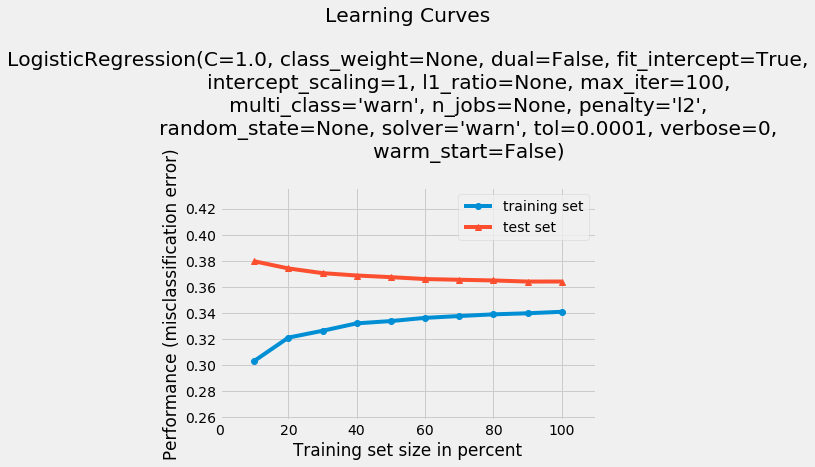

In [284]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train_cvt, y_train,x_validation_cvt, y_validation, classifier)

### NAVIE BAYE'S 

In [285]:
from sklearn.naive_bayes import MultinomialNB
nbclf = MultinomialNB().fit(x_train_cvt, y_train) #nb_clf is the classifier
pred_train = nbclf.predict(x_train_cvt) #get predictions on train data

from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_train, pred_train)) 
print(classification_report(y_train, pred_train)) 

pred_val = nbclf.predict(x_validation_cvt) #predict on test data
#prediction = confusion_matrix(y_test,pred_test) ##get confusion matrix for test predictions

print("Train Accuracy is ",accuracy_score(y_train,pred_train))
print("Test Accuracy is ",accuracy_score(y_validation,pred_val))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56     64549
           1       0.58      0.33      0.42     84586
           2       0.72      0.76      0.74    324720
           3       0.44      0.46      0.45    145859
           4       0.55      0.61      0.58    107677

    accuracy                           0.61    727391
   macro avg       0.57      0.54      0.55    727391
weighted avg       0.61      0.61      0.60    727391

              precision    recall  f1-score   support

           0       0.58      0.54      0.56     64549
           1       0.58      0.33      0.42     84586
           2       0.72      0.76      0.74    324720
           3       0.44      0.46      0.45    145859
           4       0.55      0.61      0.58    107677

    accuracy                           0.61    727391
   macro avg       0.57      0.54      0.55    727391
weighted avg       0.61      0.61      0.60    727391

Train Accuracy is  0.6

([0.36907298698084934,
  0.3689698786070746,
  0.3724778546126104,
  0.37728041353331776,
  0.38051939124816125,
  0.3838495625913655,
  0.38546623642651906,
  0.3876015617481681,
  0.38912947509436324,
  0.39053411438964736],
 [0.43197215628408286,
  0.4213864117533842,
  0.4177134791813691,
  0.41649772246102523,
  0.41650413806377107,
  0.4171232437287483,
  0.4161192018990184,
  0.4161737345223584,
  0.41640790402258293,
  0.41652017707063577])

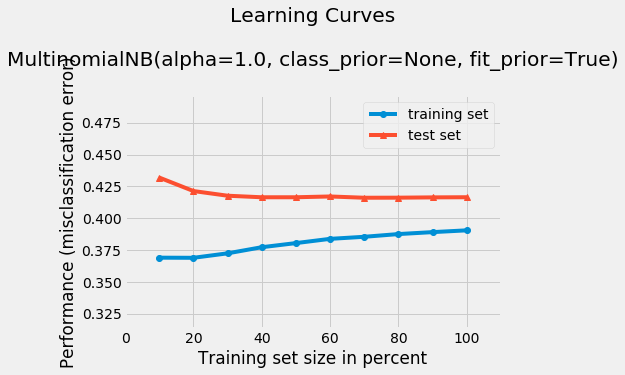

In [286]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train_cvt, y_train,x_validation_cvt, y_validation,nbclf)

### TFIDF VECTORIZATION

In [287]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Lets construct TF-idf matrix based on the train documents
tfidf_transformer = TfidfVectorizer(norm=None,stop_words='english')
x_train_tfidf = tfidf_transformer.fit_transform(x_train)
x_train_tfidf.shape

(727391, 62133)

In [288]:
#Get the tfidf matrix for test documents
x_validation_tfidf = tfidf_transformer.transform(x_validation)
x_validation_tfidf.shape

(311740, 62133)

## MODEL BUILDING ON JSON FILE USING TFIDF VECTORIZATION

### LOGISTIC REGRESSION

In [289]:
from sklearn import linear_model
from sklearn.metrics import classification_report

logisticreg_train = linear_model.LogisticRegression()
clfs = logisticreg_train.fit(x_train_tfidf, y_train) #fit logreg model on train data

pred_train=clfs.predict(x_train_tfidf) # predict on train data
pred_val=clfs.predict(x_validation_tfidf) # predict on test data


print("Train_classification Report:\n", classification_report(y_train,pred_train))
print("Test_classification Report:\n",classification_report(y_validation,pred_val))


print("Train Accuracy is ",accuracy_score(y_train,pred_train))
print("Test Accuracy is ",accuracy_score(y_validation,pred_val))

C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train_classification Report:
               precision    recall  f1-score   support

           0       0.70      0.59      0.64     64549
           1       0.66      0.42      0.51     84586
           2       0.69      0.89      0.78    324720
           3       0.62      0.42      0.50    145859
           4       0.68      0.63      0.66    107677

    accuracy                           0.68    727391
   macro avg       0.67      0.59      0.62    727391
weighted avg       0.67      0.68      0.66    727391

Test_classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56     27473
           1       0.54      0.33      0.41     36185
           2       0.66      0.86      0.74    139682
           3       0.51      0.34      0.41     62172
           4       0.62      0.57      0.60     46228

    accuracy                           0.62    311740
   macro avg       0.59      0.52      0.54    311740
weighted avg      

#### COMPARING FEATURE SELECTION AND CHOOSE THE BEST AND THEN USE  IT TO PREDICT THE TEST DATA  

#### PERFORMING COUNT VECTORIZATION ON TEST DATA

In [291]:
test_predict = cv.transform(j_data['stocktwit_tweet'])

#### PREDICTING THE TEST DATA 

In [292]:
pred_test=classifier.predict(test_predict)

In [293]:
pred_test

array([2, 4, 2, ..., 2, 2, 3], dtype=int64)

## APPENDING THE PREDICTIONS TO THE ORIGINAL TRAIN AND TEST DATA

#### FOR JSON TRAIN DATA 

In [294]:
# checking the indexes of x_train 
import numpy as np
x_train_indexes = np.array(x_train.index)

In [295]:
x_train_indexes 

array([ 565236,  335804, 1019989, ...,  165158,  451283,  486191],
      dtype=int64)

In [296]:
# checking the indexes of x_validation
x_validation_indexes = np.array(x_validation.index)

In [297]:
x_validation_indexes

array([858007, 168904, 743982, ..., 428149, 698630, 525888], dtype=int64)

In [298]:
# puting the train predictions in dataframe format
trainpredictions = pd.DataFrame(pred_train,columns=['Sc'],index = x_train_indexes)

In [299]:
trainpredictions.head()

,Sc
565236,4
335804,2
1019989,2
545049,2
946685,2


In [300]:
# putting the validation predictions in dataframe format 
validationpredictions = pd.DataFrame(pred_validation,columns=['Sc'],index=x_validation_indexes)

In [301]:
validationpredictions.head()

,Sc
858007,2
168904,2
743982,2
126802,2
449148,4


In [302]:
# concatinating both train and validation prediction to one coloumn 
predictions = pd.concat([trainpredictions,validationpredictions])

In [303]:
predictions.head()

,Sc
565236,4
335804,2
1019989,2
545049,2
946685,2


#### APPENDING THE TRAIN AND VALIDATION PREDICTIONS TO THE TRAIN DATA 

In [304]:
lasttrain = pd.merge(json_data,predictions,how='inner',left_index=True, right_index=True)

In [305]:
lasttrain.head()

,sentiment_score,stocktwit_tweet,ticker,date,time,Sc
0,3,go hesitate however chart stable go upward,amd,2018-09-19,18:38:28,2
1,3,despite china trade war hold well,cat,2018-10-09,03:51:06,3
2,2,wtf,avgo,2018-07-12,13:35:32,2
3,2,new insider file muller klaus peter transactio...,ph,2018-07-19,03:32:50,2
4,3,bounce tommorrow right thing gtfo,fb,2018-08-23,19:07:54,3


#### FOR JSON TEST DATA

In [306]:
# converting the predictions value into dataframe format 
testpredictions = pd.DataFrame(pred_test,columns=['Sc'])

In [307]:
testpredictions.head()

,Sc
0,2
1,4
2,2
3,2
4,0


#### APPENDING THE TEST DATA  PREDICTION TO THE ORIGINAL TEST DATA 

In [308]:
lasttest = pd.merge(j_data,testpredictions,how='inner',left_index=True, right_index=True)

In [309]:
lasttest.head()

,stocktwit_tweet,ticker,date,time,Sc
0,nothing exit,celg,2018-10-25,14:26:16,2
1,yall exhaust buyer first green candle byeeeeee,amd,2018-07-13,13:50:39,4
2,day traders day,amd,2018-09-25,19:10:54,2
3,,cbs,2018-07-27,22:45:48,2
4,weak price action far today afraid go short go...,mu,2018-07-31,14:59:06,0


#                            CSV TRAIN AND TEST PREPROCESSING

In [310]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [311]:
# Read the train  data
csv_data = pd.read_csv('D:\\PHD FINAL\\train_factors-1573207730757 (2).csv')   

In [312]:
csv_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [313]:
# read the test data
c_data = pd.read_csv('D:\\PHD FINAL\\TestData\\test_factors.csv') 

In [314]:
c_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,21/07/18,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,05/10/18,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,01/10/18,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,24/10/18,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,27/07/18,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [315]:
# Dimensions of train data
csv_data.shape

(27006, 11)

In [316]:
# dimensions of test data
c_data.shape

(11575, 10)

In [317]:
# Column names of train data
csv_data.columns

Index(['Id', 'date', 'ticker', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7',
       'alpha'],
      dtype='object')

In [318]:
# Column names of test data
c_data.columns

Index(['Id', 'date', 'ticker', 'SF1', 'SF2', 'SF3', 'SF4', 'SF5', 'SF6',
       'SF7'],
      dtype='object')

In [319]:
# Droping id coloumn from train data
cols_drop = ['Id']
csv_data.drop(cols_drop,axis=1,inplace=True)

In [320]:
Id1=c_data[['Id']]

In [321]:
# Droping id coloumn from test data
cols_drop = ['Id']
c_data.drop(cols_drop,axis=1,inplace=True)

In [322]:
# Summary of train data
csv_data.describe()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
count,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000
mean,0.005429,-0.001005,-0.024421,-0.042420,0.041465,0.002597,0.036744,2.379582
std,0.941853,0.996130,0.539555,1.111309,0.976028,0.998839,1.204473,1.008681
min,-4.114670,-4.578587,-2.609150,-6.329798,-5.480268,-4.338751,-5.347869,1.000000
25%,-0.596792,-0.666310,-0.300187,-0.767247,-0.518641,-0.668027,-0.688198,2.000000
50%,0.012104,-0.013257,-0.040786,-0.058629,0.072127,0.007417,0.081374,2.000000
75%,0.611574,0.669094,0.241424,0.677433,0.616538,0.674592,0.807556,3.000000
max,4.415048,3.822270,3.452486,4.907407,4.779911,4.075428,5.182912,4.000000


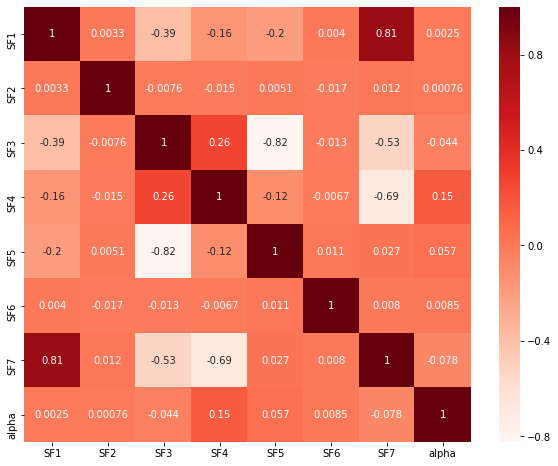

In [364]:
temp=csv_data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True, cmap ='Reds')

In [323]:
# summary of test data
c_data.describe()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7
count,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000
mean,0.001546,0.003995,-0.029754,-0.047606,0.053956,-0.000428,0.037914
std,0.924519,0.997903,0.537651,1.097842,0.965109,1.003503,1.192223
min,-4.130410,-4.034445,-4.259227,-4.704038,-4.545787,-4.317883,-5.031257
25%,-0.580470,-0.673206,-0.308838,-0.754051,-0.502280,-0.682896,-0.684029
50%,0.011865,-0.001464,-0.044590,-0.055108,0.084598,0.008303,0.081955
75%,0.600965,0.685805,0.228484,0.649046,0.620426,0.680800,0.807105
max,4.519223,4.108285,2.763214,4.794511,5.646556,3.900014,6.005315


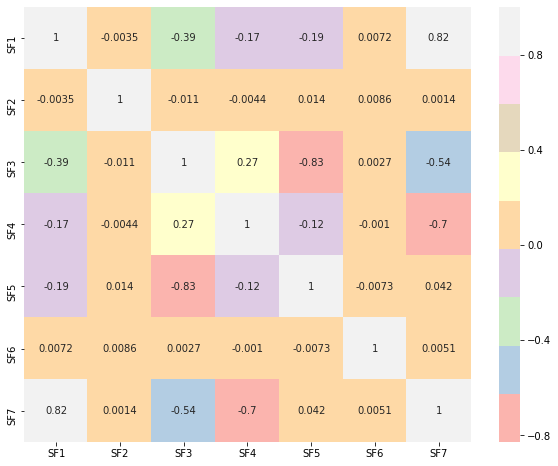

In [366]:
temp=c_data.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True, cmap ='Pastel1')

In [324]:
# checking for null values in train data
csv_data.isnull().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
dtype: int64

In [325]:
# checking for null values in test  data
c_data.isnull().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
dtype: int64

In [326]:
#converting date datatype to datetime of train data
csv_data['date'] = csv_data['date'].apply(lambda x: '20'+x.split('/')[-1]+'-'+x.split('/')[1]+'-'+x.split('/')[0])
csv_data['date']=pd.to_datetime(csv_data['date']).dt.date

In [327]:
csv_data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2018-10-11,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,2018-07-10,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,2018-09-12,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [328]:
# converting date datatype to datetime of test data
c_data['date'] = c_data['date'].apply(lambda x: '20'+x.split('/')[-1]+'-'+x.split('/')[1]+'-'+x.split('/')[0])
c_data['date']=pd.to_datetime(c_data['date']).dt.date

In [329]:
c_data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,2018-07-21,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,2018-10-05,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,2018-10-01,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,2018-10-24,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,2018-07-27,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [333]:
# checking the datatypes of train data
csv_data.dtypes

date       object
ticker     object
SF1       float64
SF2       float64
SF3       float64
SF4       float64
SF5       float64
SF6       float64
SF7       float64
alpha       int64
dtype: object

In [331]:
# checking the data types of test data
c_data.dtypes

date       object
ticker     object
SF1       float64
SF2       float64
SF3       float64
SF4       float64
SF5       float64
SF6       float64
SF7       float64
dtype: object

In [332]:
# checking value counts of ticker of train data
csv_data["ticker"].value_counts()

$BAC      90
$NVDA     89
$GOOGL    88
$NFLX     88
$F        88
$SHLD     88
$AMD      87
$FB       87
$ATVI     86
$CHK      86
$DIS      85
$MSFT     85
$MU       85
$AAPL     84
$BA       83
$IBM      83
$CELG     83
$GOOG     82
$AAL      82
$COST     82
$JPM      82
$LMT      82
$INTC     81
$CLF      81
$CAT      80
$GE       80
$T        80
$XOM      79
$WYNN     79
$PYPL     79
          ..
$cnp       1
$ECHO      1
$CALA      1
$mco       1
$P         1
$TGE       1
$zion      1
$$NKE      1
$amrn      1
$$s        1
$vrsn      1
$TTWO      1
$eix       1
$ivz       1
$QDEL      1
$expd      1
$jef       1
$SQQQ      1
$UNVR      1
$GBX       1
$duk       1
$rl        1
$AmD       1
$Syf       1
$VKTX      1
$KTOS      1
$GBR       1
$chtr      1
$trv       1
$gww       1
Name: ticker, Length: 1304, dtype: int64

In [334]:
# checking the value count of ticker for test data
c_data["ticker"].value_counts()

$AMZN    46
$JCP     43
$GE      43
$T       42
$M       39
$WMT     39
$AAPL    39
$GM      38
$JNJ     38
$AVGO    38
$MU      38
$S       37
$AMAT    37
$PYPL    37
$V       37
$LOW     37
$INTC    36
$CLF     36
$MSFT    36
$SBUX    36
$AMD     36
$CHK     36
$LRCX    36
$FB      36
$X       36
$CELG    36
$QCOM    35
$NFLX    35
$APA     35
$NKE     35
         ..
$VALE     1
$klac     1
$BLFS     1
$LXK      1
$DJIA     1
$df       1
$CLI      1
$GNRC     1
$shak     1
$NTNX     1
$mo       1
$swks     1
$bsx      1
$eb       1
$ads      1
$mgm      1
$kmb      1
$bmy      1
$GSAT     1
$TTOO     1
$MDB      1
$etr      1
$ABX      1
$apc      1
$ksu      1
$mmm      1
$HCBK     1
$BB       1
$LGND     1
$avy      1
Name: ticker, Length: 1012, dtype: int64

In [335]:
# checking for unique tickers for train data
csv_data["ticker"].unique

<bound method Series.unique of 0        $NTAP
1        $WYNN
2         $DRI
3          $ge
4          $FE
5           $F
6         $LOW
7        $ILMN
8         $cmg
9         $NEE
10        $LEN
11        $FTR
12        $tif
13       $COST
14       $LRCX
15         $OI
16       $DLTR
17         $VZ
18       $CBOE
19       $CDNS
20        $MYL
21       $WYNN
22        $BIG
23        $DNR
24       $AMZN
25        $SYK
26        $DAL
27         $ba
28        $PHM
29         $MO
         ...  
26976     $CHD
26977     $low
26978    $AMAT
26979    $SHLD
26980     $KMX
26981    $TGNA
26982    $SBAC
26983      $DO
26984     $SLB
26985     $JNJ
26986     $DNR
26987     $VTR
26988    $ORLY
26989    $NVDA
26990       $X
26991     $PEG
26992     $BLK
26993     $AMP
26994       $V
26995       $V
26996    $AMZN
26997     $KEY
26998      $EA
26999     $PXD
27000    $TMUS
27001      $RF
27002      $PG
27003     $JCP
27004    $NVDA
27005     $WBA
Name: ticker, Length: 27006, dtype: object>

In [336]:
# checking unique tickers for test data
c_data["ticker"].unique

<bound method Series.unique of 0         $INTC
1         $CTSH
2           $CB
3         $CTAS
4         $intc
5          $TSN
6          $NUE
7        $GOOGL
8          $SPY
9          $BDX
10         $PKG
11        $KORS
12         $AGN
13         $UDR
14        $NAVI
15        $Nflx
16        $qcom
17         $KSS
18          $WY
19         $ACN
20          $AN
21         $ETR
22         $LMT
23         $IFF
24         $DNR
25         $WAT
26         $UTX
27          $BA
28        $TSCO
29         $MCD
          ...  
11545      $EXC
11546      $CVS
11547      $UHS
11548     $ULTA
11549      $VFC
11550      $MNK
11551       $EA
11552      $STZ
11553     $TSCO
11554     $INCY
11555     $ORCL
11556      $NWL
11557      $DIS
11558     $FFIV
11559      $WDC
11560     $ADSK
11561      $BAX
11562      $UNP
11563      $AEP
11564      $GIS
11565       $fb
11566      $PNR
11567     $SHLD
11568      $PSA
11569      $ANF
11570        $T
11571      $WFC
11572      $MAT
11573       $RF
11574    

### GRAPHS FOR ALL THE STOCK FACTORS  OF TRAIN DATA

Text(0.5, 1.0, 'Distribution of SF1')

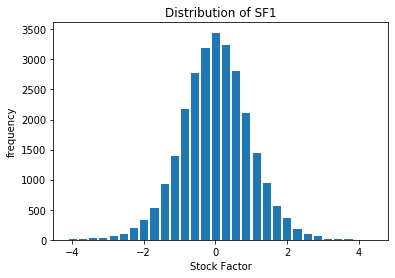

In [371]:
# graph for distribution of stock factor 1 
hist(csv_data.SF1, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF1')

Text(0.5, 1.0, 'Distribution of SF2')

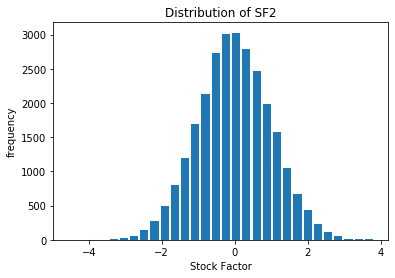

In [373]:
# graph for distribution of stock factor 2
hist(csv_data.SF2, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF2')

Text(0.5, 1.0, 'Distribution of SF3')

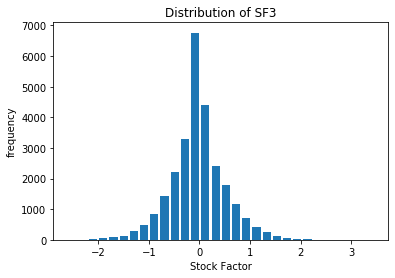

In [374]:
#graph for distribution of stock factor 3
hist(csv_data.SF3, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF3')

Text(0.5, 1.0, 'Distribution of SF4')

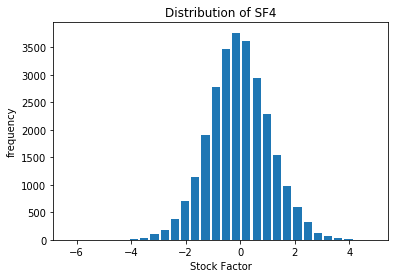

In [375]:
#graph for distribution of stock factor 4
hist(csv_data.SF4, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF4')

Text(0.5, 1.0, 'Distribution of SF5')

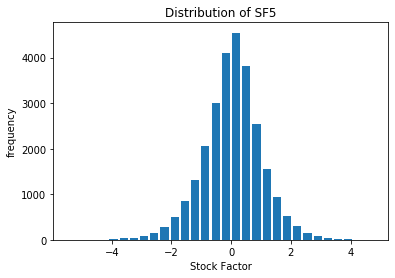

In [376]:
# graph for distribution of stock factor 5
hist(csv_data.SF5, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF5')

Text(0.5, 1.0, 'Distribution of SF6')

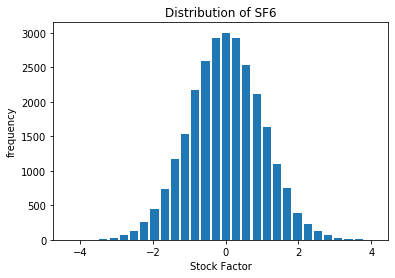

In [377]:
# graph for distribution of stock factor 6
hist(csv_data.SF6, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF6')

Text(0.5, 1.0, 'Distribution of SF7')

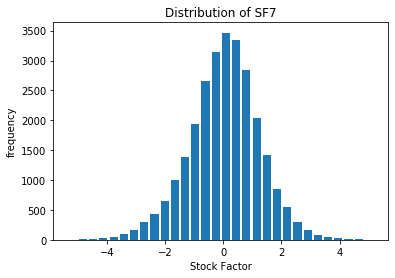

In [378]:
# graph for distribution of stock factor 7
hist(csv_data.SF7, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF7')

In [337]:
# changing the ticker of train data to lower case 
csv_data['ticker'] = csv_data['ticker'].apply(lambda x:x.replace('$',"")).str.lower()

In [338]:
csv_data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2018-10-11,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,2018-07-10,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,2018-09-12,fe,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [339]:
# changing the ticker of test data to lower case 
c_data['ticker'] = c_data['ticker'].apply(lambda x:x.replace('$',"")).str.lower()

In [340]:
c_data.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,2018-07-21,intc,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,2018-10-05,ctsh,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,2018-10-01,cb,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,2018-10-24,ctas,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,2018-07-27,intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


### GRAPHS FOR ALL STOCK FACTORS OF TEST DATA

Text(0.5, 1.0, 'Distribution of SF1')

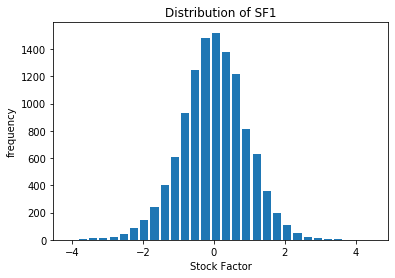

In [381]:
# graph for distribution of stock factor 1 
hist(c_data.SF1, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF1')

Text(0.5, 1.0, 'Distribution of SF2')

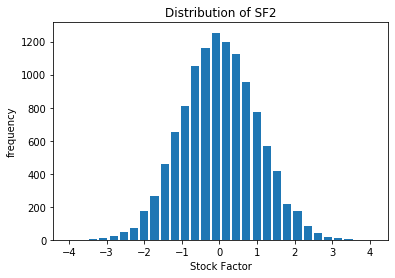

In [382]:
# graph for distribution of stock factor 2
hist(c_data.SF2, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF2')

Text(0.5, 1.0, 'Distribution of SF3')

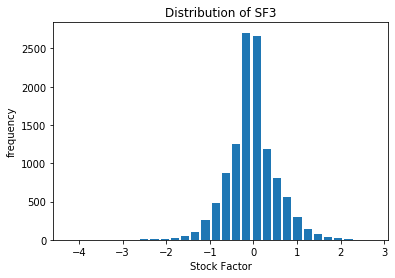

In [383]:
#graph for distribution of stock factor 3
hist(c_data.SF3, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF3')

Text(0.5, 1.0, 'Distribution of SF4')

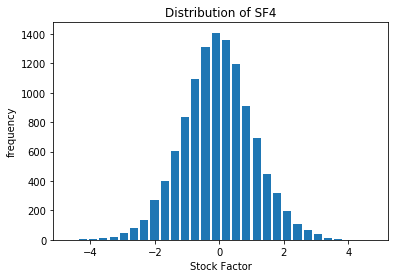

In [384]:
#graph for distribution of stock factor 4
hist(c_data.SF4, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF4')

Text(0.5, 1.0, 'Distribution of SF5')

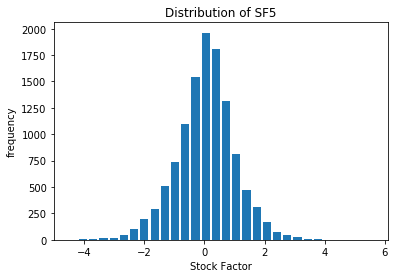

In [385]:
# graph for distribution of stock factor 5
hist(c_data.SF5, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF5')

Text(0.5, 1.0, 'Distribution of SF6')

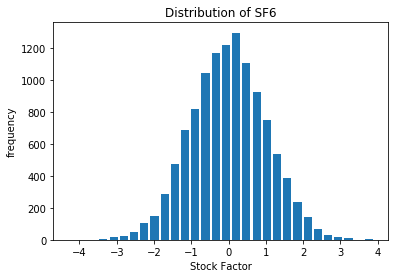

In [386]:
# graph for distribution of stock factor 6
hist(c_data.SF6, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF6')

Text(0.5, 1.0, 'Distribution of SF7')

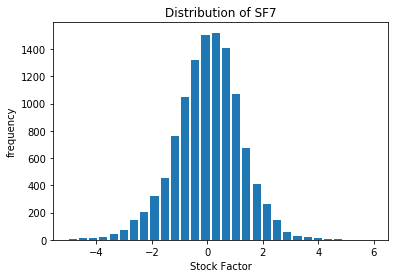

In [387]:
# graph for distribution of stock factor 7
hist(c_data.SF7, bins=30 , rwidth=.8)
xlabel('Stock Factor')
ylabel('frequency')
title('Distribution of SF7')

In [341]:
# checking the datatypes of train data
csv_data.dtypes

date       object
ticker     object
SF1       float64
SF2       float64
SF3       float64
SF4       float64
SF5       float64
SF6       float64
SF7       float64
alpha       int64
dtype: object

In [342]:
# checking the data types of test data 
c_data.dtypes

date       object
ticker     object
SF1       float64
SF2       float64
SF3       float64
SF4       float64
SF5       float64
SF6       float64
SF7       float64
dtype: object

In [343]:
# changing the datatype to datetime for train data
import datetime as datetime
csv_data['date']=pd.to_datetime(csv_data['date'])

In [344]:
csv_data.dtypes

date      datetime64[ns]
ticker            object
SF1              float64
SF2              float64
SF3              float64
SF4              float64
SF5              float64
SF6              float64
SF7              float64
alpha              int64
dtype: object

In [345]:
# changing the datatype to datetime for test data
import datetime as datetime
c_data['date']=pd.to_datetime(c_data['date'])

In [346]:
c_data.dtypes

date      datetime64[ns]
ticker            object
SF1              float64
SF2              float64
SF3              float64
SF4              float64
SF5              float64
SF6              float64
SF7              float64
dtype: object

# MERGING THE TRAIN JSON DATA WITH TRAIN CSV DATA

In [149]:
merge = lasttrain[['date','ticker','Sc']].groupby(['date','ticker']).mean()

In [150]:
merge.head()

Sc
date       ticker          
2018-07-01 aaba    2.000000
           aal     2.833333
           aap     1.000000
           aapl    2.121951
           abbv    1.666667

In [151]:
merge.reset_index(level=['date','ticker'],inplace=True)

In [152]:
merge.head()

,date,ticker,Sc
0,2018-07-01,aaba,2.000000
1,2018-07-01,aal,2.833333
2,2018-07-01,aap,1.000000
3,2018-07-01,aapl,2.121951
4,2018-07-01,abbv,1.666667


In [153]:
finaltrain = pd.merge(csv_data,merge,how='inner',left_on=['date','ticker'], right_on = ['date','ticker'])

In [154]:
finaltrain.shape

(24839, 11)

In [155]:
finaltrain.isna().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
Sc        0
dtype: int64

# MERGING THE TEST JSON DATA WITH THE TEST CSV DATA

In [156]:
merge1 = lasttest[['date','ticker','Sc']].groupby(['date','ticker']).mean()

In [157]:
merge1.head()

Sc
date       ticker          
2018-07-01 aal     0.000000
           aapl    2.272727
           aep     2.000000
           aes     3.000000
           alxn    0.000000

In [158]:
merge1.reset_index(level=['date','ticker'],inplace=True)

In [159]:
merge1.head()

,date,ticker,Sc
0,2018-07-01,aal,0.000000
1,2018-07-01,aapl,2.272727
2,2018-07-01,aep,2.000000
3,2018-07-01,aes,3.000000
4,2018-07-01,alxn,0.000000


In [160]:
finaltest = pd.merge(c_data,merge1,how='left', left_on=['date','ticker'], right_on=['date','ticker'])

In [161]:
finaltest.shape

(11575, 10)

In [162]:
finaltest.isna().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
Sc        0
dtype: int64

### FINAL MERGED TRAIN DATA 

In [163]:
finaltrain.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha,Sc
0,2018-08-21,ntap,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2,2.000000
1,2018-10-11,wynn,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3,2.000000
2,2018-08-21,dri,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1,1.666667
3,2018-07-10,ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2,2.301587
4,2018-07-10,ge,0.394782,-0.532809,0.539375,1.934485,-1.177355,1.519912,-0.959793,3,2.301587


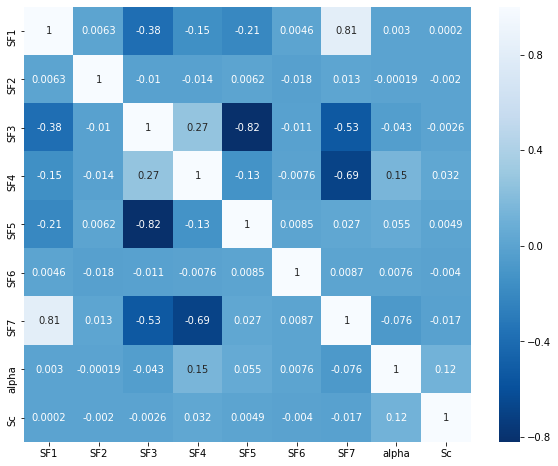

In [401]:
temp=finaltrain.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True, cmap ='Blues_r')

### FINAL MERGED TEST DATA

In [164]:
finaltest.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,Sc
0,2018-07-21,intc,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,3.000000
1,2018-10-05,ctsh,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,3.000000
2,2018-10-01,cb,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2.000000
3,2018-10-24,ctas,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2.500000
4,2018-07-27,intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2.333333


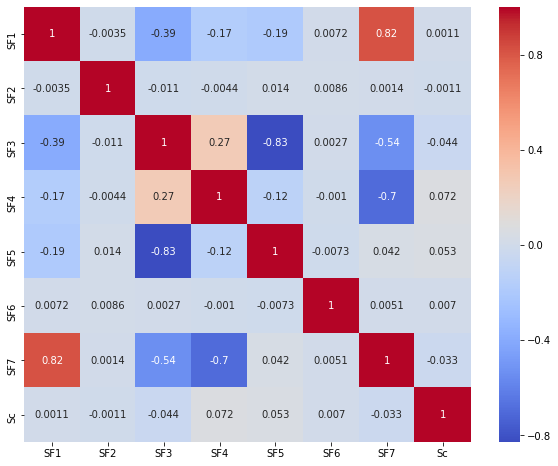

In [395]:
temp=finaltest.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(temp,annot=True, cmap ='coolwarm')

### TRAIN AND TEST SPLIT

In [347]:
from sklearn.model_selection import train_test_split 
x=finaltrain.copy().drop(["alpha","ticker","date"],axis=1)
y=finaltrain["alpha"]
x_train1, x_validation1, y_train1, y_validation1 = train_test_split(x,y,test_size=0.3,random_state=123)

In [348]:
x_train1.shape

(17387, 8)

In [349]:
 y_train1.shape

(17387,)

In [350]:
x_validation1.shape

(7452, 8)

In [351]:
y_validation1.shape

(7452,)

### MODEL BUILDING 

#### MULTI LAYER PERCEPTRON (MLP CLASSIFIER)

In [352]:
from sklearn.neural_network import MLPClassifier
mlpmodel1= MLPClassifier(activation='relu',batch_size=22,random_state=1234,hidden_layer_sizes=(50,))
mlpmodel1.fit(x_train1,y_train1)

from sklearn.metrics import accuracy_score,classification_report
sklearn_mlp_train_preds1 = mlpmodel1.predict(x_train1)
sklearn_mlp_validation_preds1 = mlpmodel1.predict(x_validation1)

print(classification_report(y_train1,sklearn_mlp_train_preds1))
print(classification_report(y_validation1,sklearn_mlp_validation_preds1))

print("Train Accuracy is ",accuracy_score(y_train1,sklearn_mlp_train_preds1))
print("Test Accuracy is ",accuracy_score(y_validation1,sklearn_mlp_validation_preds1))



C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


              precision    recall  f1-score   support

           1       0.70      0.61      0.65      3385
           2       0.86      0.96      0.91      6908
           3       0.67      0.62      0.64      3842
           4       0.72      0.71      0.72      3252

    accuracy                           0.77     17387
   macro avg       0.74      0.72      0.73     17387
weighted avg       0.76      0.77      0.76     17387

              precision    recall  f1-score   support

           1       0.69      0.57      0.63      1486
           2       0.86      0.96      0.91      3021
           3       0.66      0.62      0.64      1557
           4       0.72      0.72      0.72      1388

    accuracy                           0.77      7452
   macro avg       0.74      0.72      0.73      7452
weighted avg       0.76      0.77      0.76      7452

Train Accuracy is  0.7689653189164318
Test Accuracy is  0.7697262479871175


C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Vyshnavi\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

([0.2571921749136939,
  0.25625539257981017,
  0.24424846625766872,
  0.24805867126833478,
  0.24732543425744852,
  0.23734662576687116,
  0.24067378800328676,
  0.2337335538140772,
  0.23268149284253578,
  0.23103468108356817],
 [0.30381105743424586,
  0.2745571658615137,
  0.2532206119162641,
  0.24396135265700483,
  0.24208266237251744,
  0.24020397208803007,
  0.24100912506709607,
  0.23255501878690285,
  0.2349704777241009,
  0.23027375201288244])

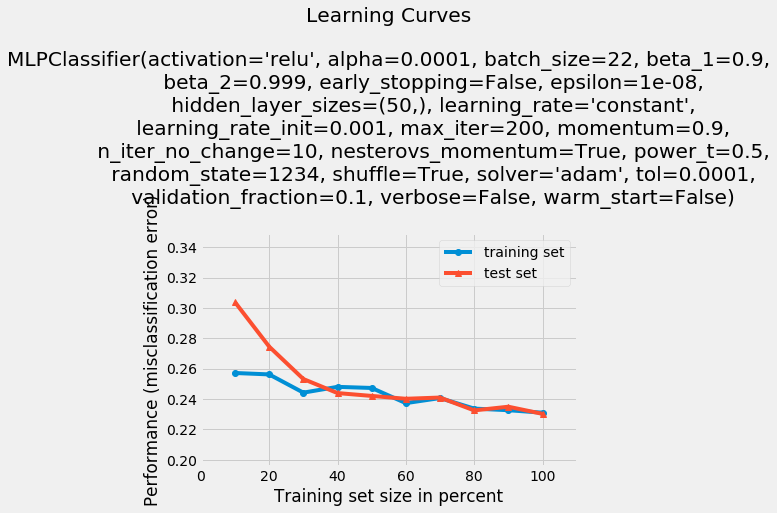

In [353]:
!pip install mlxtend

from mlxtend.plotting import plot_learning_curves
plot_learning_curves(x_train1, y_train1, x_validation1, y_validation1,mlpmodel1 )

In [354]:
 # denoting the final test data to df variable after dropping date and ticker coloumn
df=finaltest.drop(["date","ticker"],axis=1)

In [355]:
df.head()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,Sc
0,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,3.000000
1,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,3.000000
2,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2.000000
3,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2.500000
4,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2.333333


#### PREDICTING THE MODEL

In [356]:
predict1 = mlpmodel1.predict(df)

In [357]:
predict1

array([4, 4, 2, ..., 4, 2, 2], dtype=int64)

#### SUBMISSION FILE

In [358]:
# converting the 
predictions2_df= pd.DataFrame()
predictions2_df=Id1
predictions2_df["alpha"]=pd.Series(predict1)

C:\Users\Vyshnavi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [359]:
predictions2_df.to_csv('final_sub18.csv',index=False)

In [360]:
predictions2_df.head()

,Id,alpha
0,270007,4
1,270008,4
2,270009,2
3,270010,1
4,270011,4


In [361]:
predictions2_df['alpha'].value_counts()

2    5233
4    2263
1    2177
3    1902
Name: alpha, dtype: int64